In [1]:
import pandas as pd

In [2]:
df_2018 = pd.read_csv("DATOS_EMPLEADOS_2018.csv", index_col=0)

In [3]:
df_2019 = pd.read_csv("DATOS_EMPLEADOS_2019.csv", index_col=0)

In [4]:
df_2018.head()

,codigo,fec_nac,sexo,edo_civ,depto,fec_ing,fec_baj,jorn,puesto,cp,label,antig
1,7840,1985-12-30,FEMENINO,SOLTERO,87,2018-12-27,NaN,1,0185,50290,1,4
2,7505,1989-09-30,MASCULINO,SOLTERO,82,2017-09-19,NaN,1,0003A,54948,1,468
6,6600,1973-02-08,FEMENINO,SOLTERO,80,2015-10-01,NaN,1,0001,7460,1,1187
8,7685,1995-11-23,FEMENINO,SOLTERO,76,2018-06-08,NaN,1,0001,56617,1,206
9,7331,1977-04-02,FEMENINO,CASADO,45,2018-09-04,NaN,1,0001,8100,1,118


In [5]:
df_2018_siguen = df_2018.loc[df_2018["label"] == 1]

In [6]:
df_2018_fueron = df_2018.loc[df_2018["label"] == 0]

In [7]:
df_2019_siguen = df_2019.loc[df_2019["label"] == 1]

In [8]:
df_2019_fueron = df_2019.loc[df_2019["label"] == 0]

In [9]:
df_2018_siguen["codigo"].count() #este es el que hay que comparar con 2019

192

In [10]:
df_2018_fueron["codigo"].count()

310

In [11]:
df_2019_siguen["codigo"].count()

196

In [12]:
df_2019_fueron["codigo"].count()

327

In [13]:
comparison = pd.DataFrame({
"activos_en_2018": df_2018_siguen["codigo"]
})
comparison.head()

,activos_en_2018
1,7840
2,7505
6,6600
8,7685
9,7331


In [14]:
df_2019_fueron["empleado"] = df_2019_fueron["codigo"]

C:\Users\dell\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_2019_fueron.head()

,codigo,fec_nac,sexo,edo_civ,depto,fec_ing,fec_baj,jorn,puesto,cp,label,antig,empleado
1,7840,1985-12-30,FEMENINO,SOLTERO,87,2018-12-27,2019-02-04,1,0185,50290,0,39,7840
2,7879,1993-12-28,MASCULINO,SOLTERO,72,2019-02-11,2019-07-22,1,0001,9630,0,161,7879
3,7505,1989-09-30,MASCULINO,SOLTERO,82,2017-09-19,2019-02-21,1,0003A,54948,0,520,7505
6,7331,1977-04-02,FEMENINO,CASADO,45,2018-09-04,2019-08-08,1,0001,8100,0,338,7331
9,7774,1995-12-07,FEMENINO,CASADO,87,2018-09-27,2019-01-14,1,0001,50200,0,109,7774


In [16]:
comparison["inactivos_en_2019"] = comparison["activos_en_2018"].map(df_2019_fueron.set_index('codigo')["empleado"].to_dict())

In [17]:
comparison = comparison[comparison["inactivos_en_2019"].notnull()]

In [18]:
comparison.head(10)

,activos_en_2018,inactivos_en_2019
1,7840,7840.0
2,7505,7505.0
9,7331,7331.0
12,7774,7774.0
21,3652,3652.0
25,4044,4044.0
26,7593,7593.0
44,7312,7312.0
50,7737,7737.0
55,6210,6210.0


In [19]:
prediction_1 = pd.read_csv("test1/results_deep.csv", index_col=0)

In [20]:
prediction_1["empleado"] = prediction_1["codigo_x"]

In [21]:
prediction_1_fue = prediction_1.loc[prediction_1["prediction"] == "fue"]

In [22]:
comparison["prediction_1"] = comparison["inactivos_en_2019"].map(prediction_1_fue.set_index('codigo_x')["empleado"].to_dict())

In [23]:
prediction_2 = pd.read_csv("test2/results_deep.csv", index_col=0)

In [24]:
prediction_2["empleado"] = prediction_2["codigo_x"]

In [25]:
prediction_2_fue = prediction_2.loc[prediction_2["prediction"] == "fue"]

In [26]:
comparison["prediction_2"] = comparison["inactivos_en_2019"].map(prediction_2_fue.set_index('codigo_x')["empleado"].to_dict())

In [27]:
prediction_3 = pd.read_csv("test3/results_deep.csv", index_col=0)

In [28]:
prediction_3["empleado"] = prediction_3["codigo_x"]

In [29]:
prediction_3_fue = prediction_3.loc[prediction_3["prediction"] == "fue"]

In [30]:
comparison["prediction_3"] = comparison["inactivos_en_2019"].map(prediction_3_fue.set_index('codigo_x')["empleado"].to_dict())

In [31]:
comparison.head()

,activos_en_2018,inactivos_en_2019,prediction_1,prediction_2,prediction_3
1,7840,7840.0,7840.0,7840.0,7840.0
2,7505,7505.0,7505.0,NaN,7505.0
9,7331,7331.0,7331.0,7331.0,7331.0
12,7774,7774.0,7774.0,7774.0,7774.0
21,3652,3652.0,NaN,NaN,NaN


In [32]:
#comparison.loc[comparison["prediction_1"].isna() & comparison["prediction_2"].isna() & comparison["prediction_3"].isna()]

In [33]:
comparison["depto"] = comparison["inactivos_en_2019"].map(df_2019.set_index('codigo')["depto"].to_dict())

In [34]:
comparison["puesto"] = comparison["inactivos_en_2019"].map(df_2019.set_index('codigo')["puesto"].to_dict())

In [35]:
exceptions = [7545,5704,4504,7717,236,5679,7798,7811,7835,3652]

In [36]:
exceptions_df = pd.DataFrame({"exc": exceptions, "mark": 1})

In [37]:
comparison["excep"] = comparison["inactivos_en_2019"].map(exceptions_df.set_index('exc')["mark"].to_dict())

In [38]:
comparison = comparison[comparison["excep"].isna()]

In [39]:
comparison.head()

,activos_en_2018,inactivos_en_2019,prediction_1,prediction_2,prediction_3,depto,puesto,excep
1,7840,7840.0,7840.0,7840.0,7840.0,87,0185,NaN
2,7505,7505.0,7505.0,NaN,7505.0,82,0003A,NaN
9,7331,7331.0,7331.0,7331.0,7331.0,45,0001,NaN
12,7774,7774.0,7774.0,7774.0,7774.0,87,0001,NaN
25,4044,4044.0,4044.0,4044.0,4044.0,50,0018,NaN


In [40]:
comparison["activos_en_2018"].count() #estaban en 2018 y se fueron en 2019

79

In [41]:
comparison["prediction_1"].count()

69

In [42]:
comparison["prediction_2"].count()

64

In [43]:
comparison["prediction_3"].count()

65

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

C:\Users\dell\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


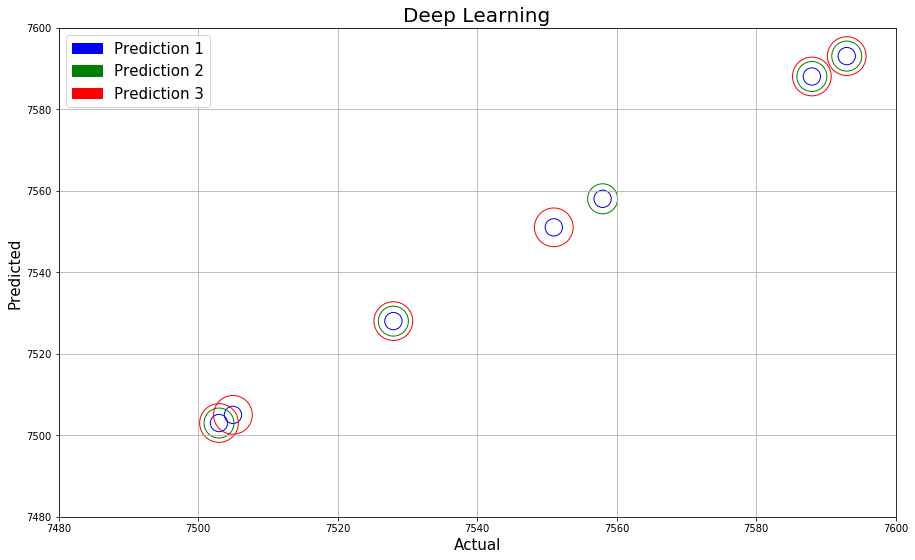

In [45]:
fig1 = plt.gcf()
fig1.set_size_inches(15, 9)

plt.scatter(comparison["inactivos_en_2019"], comparison["prediction_1"], facecolors = "none", edgecolors = "blue", s=300)
ax2 = fig1.add_subplot(111)
ax2.scatter(comparison["inactivos_en_2019"], comparison["prediction_2"], facecolors = "none", edgecolors = "green", s=900)
ax3 = fig1.add_subplot(111)
ax3.scatter(comparison["inactivos_en_2019"], comparison["prediction_3"], facecolors = "none", edgecolors = "red", s=1500)

xmin = 7480
xmax = 7600
ymin = 7480
ymax = 7600
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])

blue_patch = mpatches.Patch(color='blue', label='Prediction 1')
green_patch = mpatches.Patch(color='green', label='Prediction 2')
red_patch = mpatches.Patch(color='red', label='Prediction 3')

plt.legend(handles=[blue_patch, green_patch, red_patch,], prop={'size': 15})
plt.xlabel("Actual", fontsize = 15)
plt.ylabel("Predicted", fontsize = 15)
plt.title("Deep Learning", fontsize = 20)

plt.grid()
plt.savefig("deep_learning.svg", format="svg")
plt.show()

In [46]:
comparison.head()

,activos_en_2018,inactivos_en_2019,prediction_1,prediction_2,prediction_3,depto,puesto,excep
1,7840,7840.0,7840.0,7840.0,7840.0,87,0185,NaN
2,7505,7505.0,7505.0,NaN,7505.0,82,0003A,NaN
9,7331,7331.0,7331.0,7331.0,7331.0,45,0001,NaN
12,7774,7774.0,7774.0,7774.0,7774.0,87,0001,NaN
25,4044,4044.0,4044.0,4044.0,4044.0,50,0018,NaN


In [47]:
xg_boost = pd.read_csv("ResultsXGB.csv", index_col=0)

In [48]:
def labeling(row):
    sigue = "sigue"
    fue = "fue"
    if row == 0:
        return fue
    else:
        return sigue

In [49]:
xg_boost["prediction"] = xg_boost["prediction"].apply(lambda row: labeling(row))

In [50]:
xg_boost["actual"] = xg_boost["actual"].apply(lambda row: labeling(row))

In [51]:
xg_boost = xg_boost.reset_index()

In [52]:
xg_boost["empleado"] = xg_boost["codigo_x"]

In [53]:
comparison["xg_boost"] = comparison["inactivos_en_2019"].map(xg_boost.set_index('codigo_x')["empleado"].to_dict())

In [54]:
comparison.head()

,activos_en_2018,inactivos_en_2019,prediction_1,prediction_2,prediction_3,depto,puesto,excep,xg_boost
1,7840,7840.0,7840.0,7840.0,7840.0,87,0185,NaN,7840.0
2,7505,7505.0,7505.0,NaN,7505.0,82,0003A,NaN,7505.0
9,7331,7331.0,7331.0,7331.0,7331.0,45,0001,NaN,7331.0
12,7774,7774.0,7774.0,7774.0,7774.0,87,0001,NaN,7774.0
25,4044,4044.0,4044.0,4044.0,4044.0,50,0018,NaN,4044.0


In [55]:
comparison["activos_en_2018"].count()

79

In [56]:
comparison["xg_boost"].count()

76

In [57]:
comparison[comparison["xg_boost"].isna()]

,activos_en_2018,inactivos_en_2019,prediction_1,prediction_2,prediction_3,depto,puesto,excep,xg_boost
152,3160,3160.0,NaN,NaN,NaN,74,0001,NaN,NaN
229,7819,7819.0,NaN,NaN,NaN,80,0001,NaN,NaN
256,6978,6978.0,NaN,NaN,NaN,76,0001,NaN,NaN


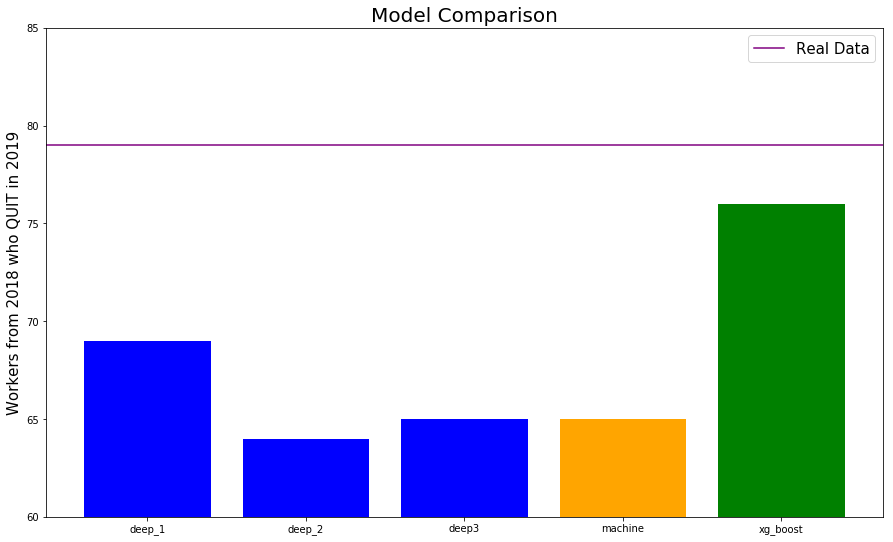

In [58]:
fig2 = plt.gcf()
fig2.set_size_inches(15, 9)

x_bar = ["deep_1","deep_2","deep3","machine","xg_boost"]
y_bar = [69,64,65,65,76]
colors_bar = ["blue","blue","blue","orange","green"]

plt.axhline(y=79, color='purple', linestyle='-')

ymin = 60
ymax = 85
axes = plt.gca()
axes.set_ylim([ymin,ymax])

label = ["Real Data"]

plt.legend(labels=label, prop={'size': 15})

plt.ylabel("Workers from 2018 who QUIT in 2019", fontsize = 15)
plt.title("Model Comparison", fontsize = 20)

plt.bar(x_bar,y_bar, color=colors_bar)
plt.savefig("final_comparison.svg", format="svg")
plt.show()